# Project: Investigate a Dataset - [FBI Gun Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Description 

> The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. 

### Questions for Analysis
> What census data is most associated with high gun per capita?<br>
> Which states have had the highest growth in gun registrations?<br>
> What is the overall trend of gun purchases?

<a id='wrangling'></a>
## Data Wrangling

### Loading the data and importing necessary modules

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
gun_data = pd.read_excel(r'C:\Users\DELL\Desktop\gun-data.xlsx', parse_dates = ['month'])
census_data = pd.read_csv(r'C:\Users\DELL\Videos\u.s.-census-data.csv')
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


### Subsetting the dataframe for columns to be used for analysis

In [19]:
gun = gun_data.loc[:, ['month', 'state', 'permit', 'totals']]

### Filling missing values with the mean of the column data and checking for duplicates

In [20]:
gun.permit.fillna(gun.permit.mean(), inplace = True)
gun.duplicated().sum()

0

### Data Cleaning

### Checking for necessary datatypes

In [21]:
gun['permit'] = gun['permit'].astype('int64')
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   12485 non-null  datetime64[ns]
 1   state   12485 non-null  object        
 2   permit  12485 non-null  int64         
 3   totals  12485 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 390.3+ KB


In [22]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

### Dropping unnecessary columns and na rows

In [23]:
census_data.drop(columns = 'Fact Note', inplace = True)

In [24]:
census_data.isna().sum()
census_data.dropna(inplace = True)

### Transposing The DataFrame

In [25]:
census_data.set_index('Fact', inplace = True)
census_T = census_data.T.reset_index()
census_T.rename(columns = {'index':'state'}, inplace = True)
census_T.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


### Checking For Incorrect Data Types

In [26]:
census_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 66 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   state                                                                                   50 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     object
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object
 4   Population, Census, April 1, 2010                                                       50 non-null     object
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                          

### Changing Data type of the fact columns from Object to floats

In [67]:
for col in census_T.columns[1:]:
    census_T[col] = census_T[col].replace(',','')
    census_T[col] = census_T[col].replace('%','')
    census_T[col] = census_T[col].replace('"','')
    census_T[col] = census_T[col].replace('$','')
    census_T[col] = census_T[col].replace('Z','0')
    census_T[col] = census_T[col].replace('D','0')
    census_T[col] = census_T[col].replace('FN','0')
    census_T[col] = census_T[col].astype('float')

In [68]:
census_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 66 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   state                                                                                   50 non-null     object 
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     float64
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     float64
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     float64
 4   Population, Census, April 1, 2010                                                       50 non-null     float64
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                   

<a id='eda'></a>
## Exploratory Data Analysis

### Exploring Population Of 2010 and 2016 with gun use during that period

In [69]:
gun['year'] = gun.month.dt.year
gun_10 = gun[gun.year == 2010]
gun_16 = gun[gun.year == 2016]
gun_10 = gun_10.groupby(['state','year']).sum()
gun_16 = gun_16.groupby(['state','year']).sum()
total_guns = gun_10.merge(gun_16, how = 'inner', on = 'state', suffixes = ['_2010', '_2016'])
total_guns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   permit_2010  55 non-null     int64
 1   totals_2010  55 non-null     int64
 2   permit_2016  55 non-null     int64
 3   totals_2016  55 non-null     int64
dtypes: int64(4)
memory usage: 2.1+ KB


In [70]:
explore_data = total_guns.merge(census_T, how = 'outer', on = 'state')
explore_data

,state,permit_2010,totals_2010,permit_2016,totals_2016,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,4621,308607,291039,616947,4863300.0,4780131.0,1.700,4779736.0,6.000,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33,1.0
1,Alaska,0,65909,3121,87647,741894.0,710249.0,4.500,710231.0,7.300,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,570640.95,2.0
2,Arizona,24751,206050,87771,416279,6931071.0,6392301.0,8.400,6392017.0,6.300,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3,113594.08,4.0
3,Arkansas,31305,191448,55456,266014,2988248.0,2916025.0,2.500,2915918.0,6.400,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,52035.48,5.0
4,California,295252,816399,1036981,2377167,39250017.0,37254522.0,5.400,37253956.0,6.300,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.1,155779.22,6.0
5,Colorado,12928,300820,85087,540514,5540545.0,5029324.0,10.200,5029196.0,6.100,...,547352.0,284554.0,194508.0,85849.0,442365.0,51722.0,469524.0,48.5,103641.89,8.0
6,Connecticut,90942,179595,148949,317692,3576452.0,3574114.0,0.100,3574097.0,5.200,...,326693.0,187845.0,106678.0,56113.0,259614.0,31056.0,281182.0,738.1,4842.36,9.0
7,Delaware,0,19240,8440,59430,952065.0,897936.0,6.000,897934.0,5.800,...,73418.0,38328.0,23964.0,14440.0,54782.0,7206.0,60318.0,460.8,1948.54,10.0
8,District of Columbia,2,349,144,875,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Florida,35,559347,337086,1435340,20612439.0,18804592.0,9.600,18801310.0,5.500,...,2100187.0,1084885.0,807817.0,926112.0,1121749.0,185756.0,1846686.0,350.6,53624.76,12.0


### Dropping NA columns
> Seems like we would have to exclude the states of District Of Columbia, Guam, Mariana Islands, Puerto Rico and Virgin Islands from our analysis because it has missing values in all of its census data.

In [71]:
explore_data.isna().sum()
explore_data.dropna(inplace = True)
explore_data.info()
explore_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 54
Data columns (total 70 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   state                                                                                   50 non-null     object 
 1   permit_2010                                                                             50 non-null     int64  
 2   totals_2010                                                                             50 non-null     int64  
 3   permit_2016                                                                             50 non-null     int64  
 4   totals_2016                                                                             50 non-null     int64  
 5   Population estimates, July 1, 2016,  (V2016)                             

,state,permit_2010,totals_2010,permit_2016,totals_2016,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,4621,308607,291039,616947,4863300.0,4780131.0,1.7,4779736.0,6.0,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33,1.0
1,Alaska,0,65909,3121,87647,741894.0,710249.0,4.5,710231.0,7.3,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,570640.95,2.0
2,Arizona,24751,206050,87771,416279,6931071.0,6392301.0,8.4,6392017.0,6.3,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3,113594.08,4.0
3,Arkansas,31305,191448,55456,266014,2988248.0,2916025.0,2.5,2915918.0,6.4,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,52035.48,5.0
4,California,295252,816399,1036981,2377167,39250017.0,37254522.0,5.4,37253956.0,6.3,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.1,155779.22,6.0


### Exploring data for 2010 and 2016

> Lets define a function to explore the relationship between population census and total guns

In [72]:
def explore(axis, list, df):
    """Returns a scatter plot showing the relationship between a given variable and items in a list in a given dataframe"""
    for x in list:
        sns.scatterplot(y = df[axis], x= df[x], data= df)
        plt.title(axis + ' and ' + x)
        plt.show()

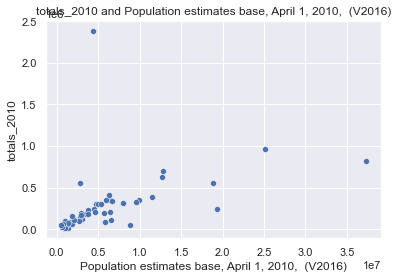

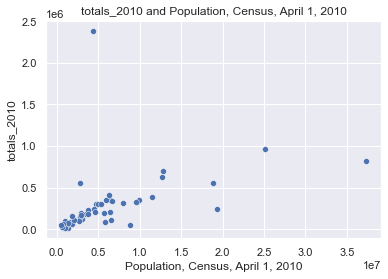

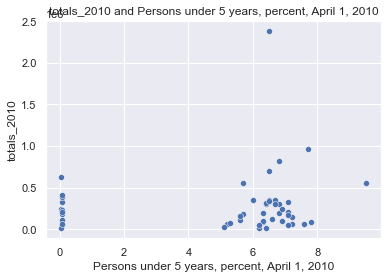

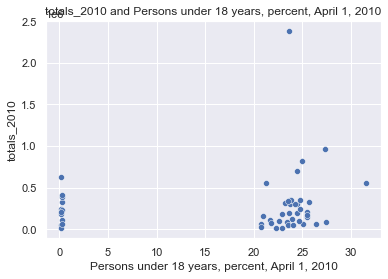

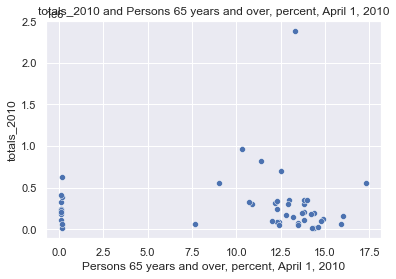

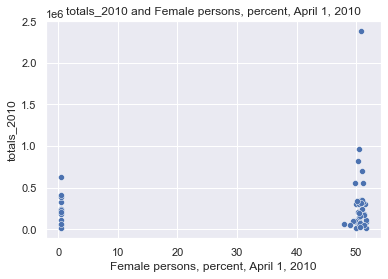

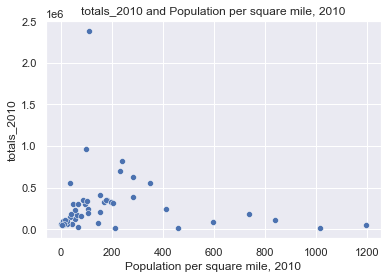

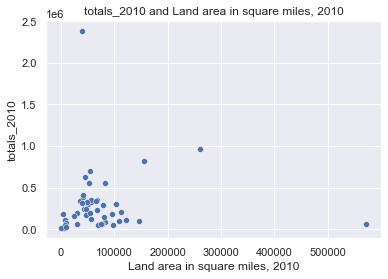

In [73]:
census_2010 = ['Population estimates base, April 1, 2010,  (V2016)', 'Population, Census, April 1, 2010', 'Persons under 5 years, percent, April 1, 2010', 'Persons under 18 years, percent, April 1, 2010', 'Persons 65 years and over, percent, April 1, 2010', 'Female persons, percent, April 1, 2010', 'Population per square mile, 2010', 'Land area in square miles, 2010']

        
explore('totals_2010', census_2010, explore_data)

> There seems to be a relationship between total number of guns per state with the following facts ('Population estimates base, April 1, 2010,  (V2016)', 'Population, Census, April 1, 2010', 'Population per square mile, 2010', 'Land area in square miles, 2010'). Lets check the 2016 census for relationship

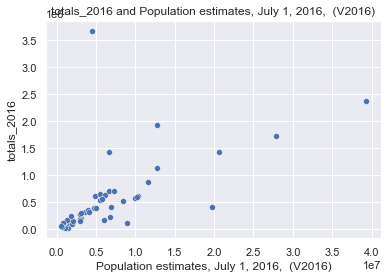

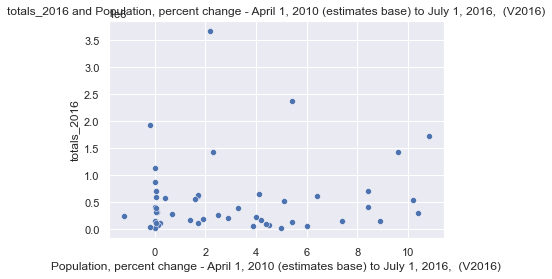

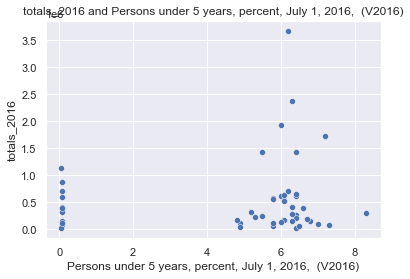

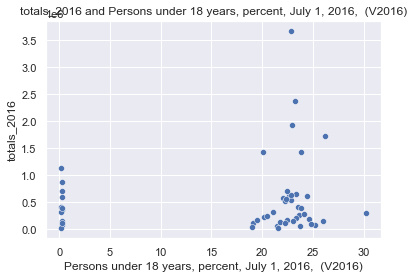

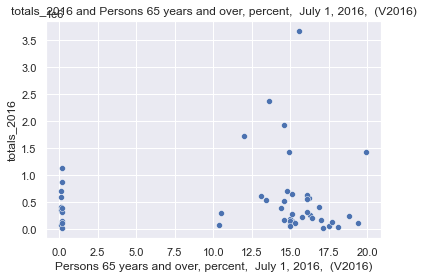

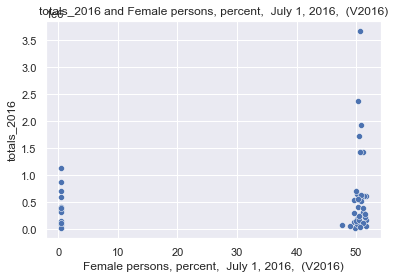

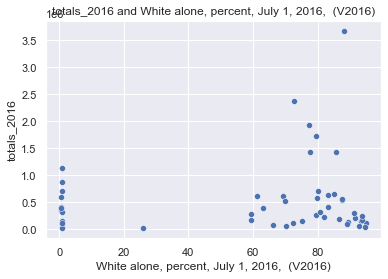

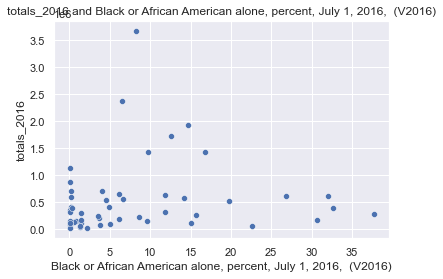

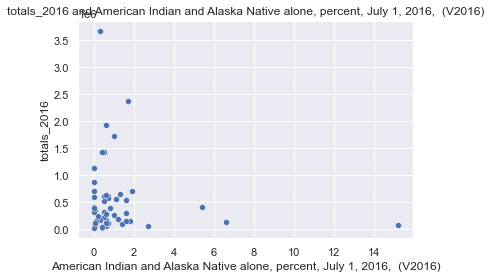

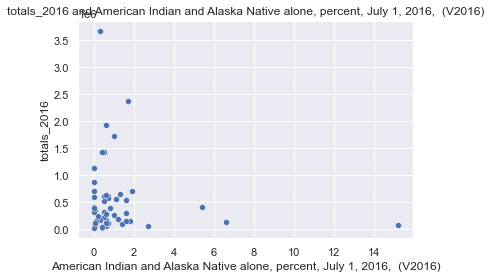

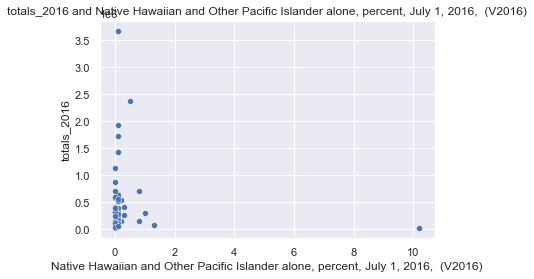

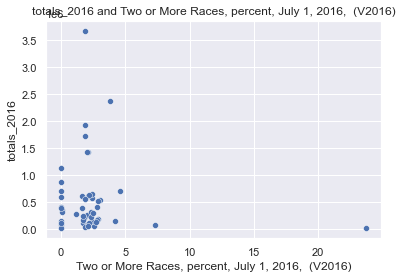

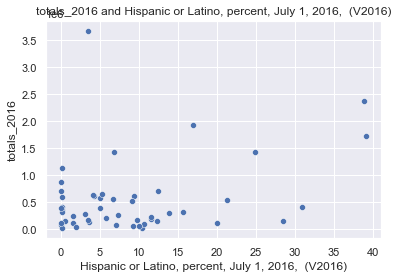

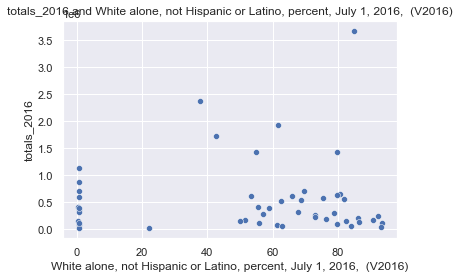

In [74]:
census_2016 = ['Population estimates, July 1, 2016,  (V2016)', 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)', 'Persons under 5 years, percent, July 1, 2016,  (V2016)', 'Persons under 18 years, percent, July 1, 2016,  (V2016)', 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)', 'Female persons, percent,  July 1, 2016,  (V2016)', 'White alone, percent, July 1, 2016,  (V2016)', 'Black or African American alone, percent, July 1, 2016,  (V2016)', 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)', 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)', 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)', 'Two or More Races, percent, July 1, 2016,  (V2016)', 'Hispanic or Latino, percent, July 1, 2016,  (V2016)', 'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)']
explore('totals_2016', census_2016, explore_data)

> There seems to be a relationship between total number of guns per state with Population estimates, July 1, 2016,  (V2016)

> Lets check the relationship between number of permits and population

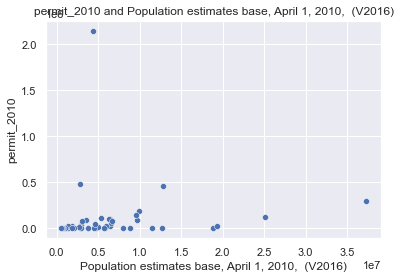

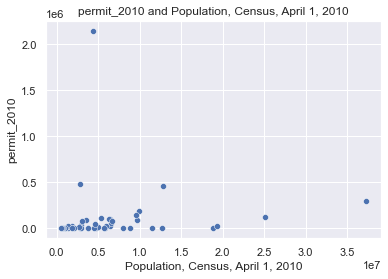

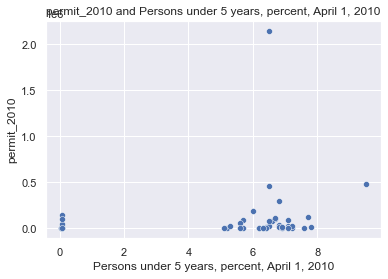

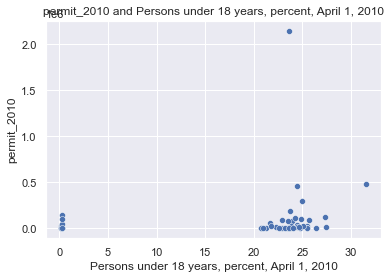

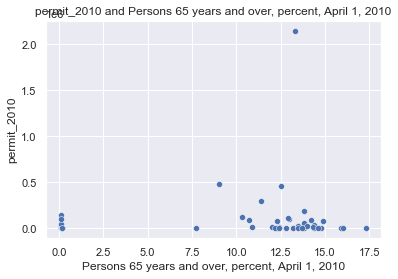

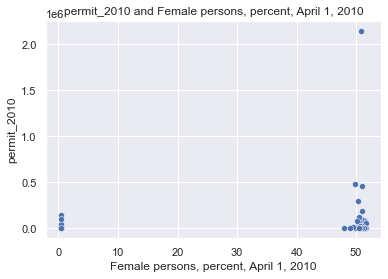

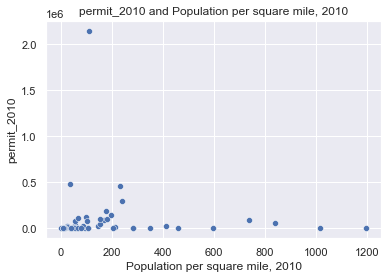

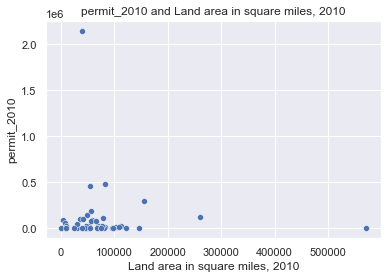

In [75]:
explore('permit_2010', census_2010, explore_data)

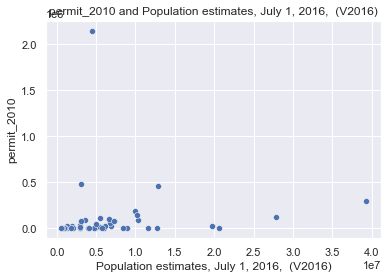

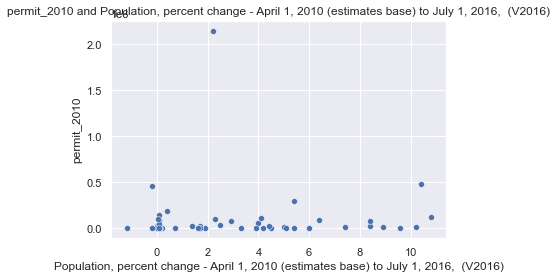

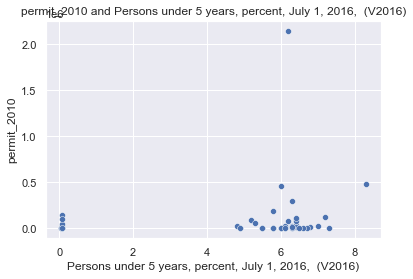

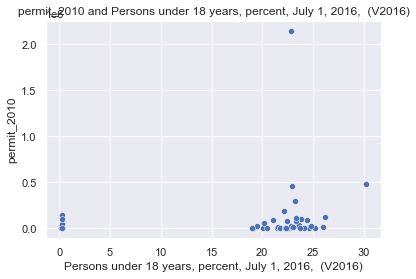

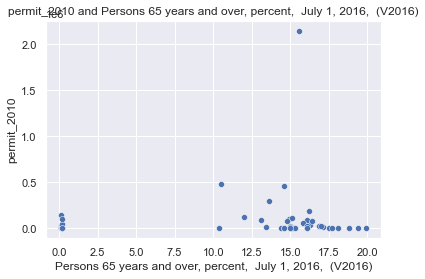

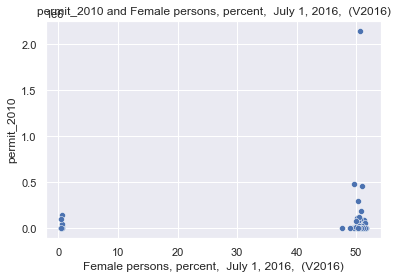

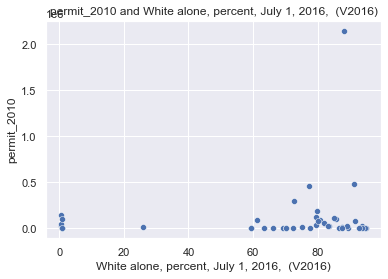

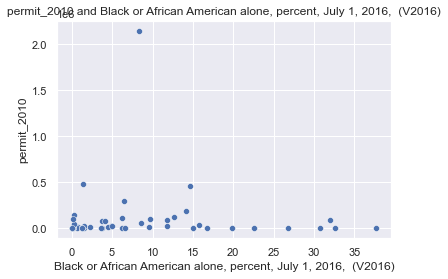

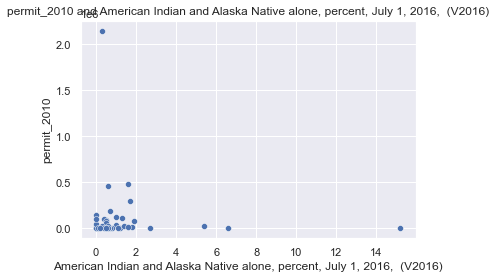

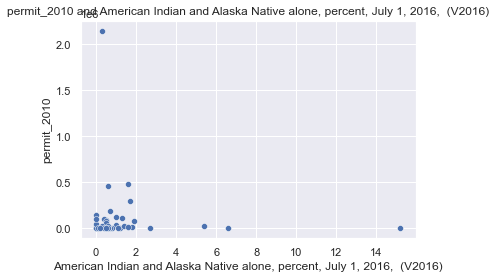

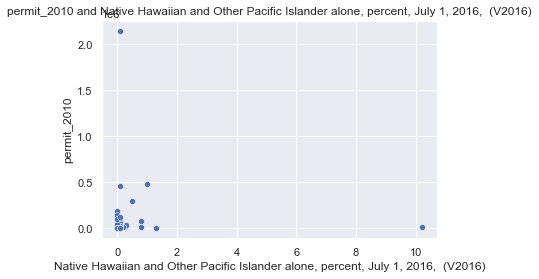

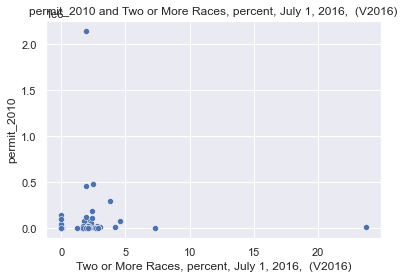

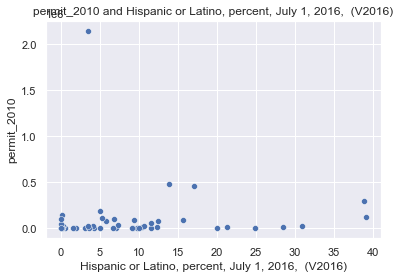

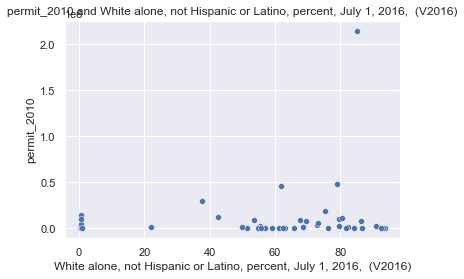

In [76]:
explore('permit_2010', census_2016, explore_data)

> From the above scatter plots of permits and census data, there is no relationship between permits and population.

### What type of guns are used the most?

> Lets view the summary statistics of the entire gun data

In [77]:
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


> Lets calculate the total number of guns used by each state

In [78]:
guns = gun_data.groupby('state').sum()
guns

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
Alabama,1047441.0,749.0,2222037.0,2626029.0,39578.0,105230,32.0,4239.0,6343.0,26.0,...,0.0,1.0,0.0,224.0,207.0,19.0,14.0,12.0,6.0,6706079
Alaska,13352.0,22.0,434602.0,572174.0,15970.0,28904,19.0,1043.0,1463.0,1.0,...,14.0,0.0,0.0,196.0,245.0,10.0,3.0,6.0,1.0,1137643
Arizona,710509.0,6701.0,1781468.0,1480762.0,56832.0,84979,6643.0,1412.0,910.0,18.0,...,3.0,0.0,0.0,300.0,189.0,37.0,21.0,16.0,3.0,4425714
Arkansas,507951.0,13595.0,965584.0,1663256.0,13053.0,61919,2146.0,1602.0,3995.0,12.0,...,0.0,0.0,0.0,199.0,215.0,16.0,12.0,13.0,4.0,3752633
California,6530543.0,0.0,5910880.0,5936770.0,342635.0,207864,16680.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19014063
Colorado,426970.0,0.0,2528422.0,2726033.0,60479.0,306871,2913.0,38.0,18.0,0.0,...,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6058482
Connecticut,1595270.0,1367.0,879260.0,638096.0,16877.0,8024,29028.0,0.0,0.0,62.0,...,0.0,0.0,0.0,30.0,37.0,3.0,41.0,25.0,5.0,3168126
Delaware,22720.0,0.0,208109.0,242235.0,5571.0,8269,42.0,97.0,104.0,0.0,...,0.0,0.0,0.0,1410.0,544.0,64.0,25.0,11.0,2.0,491369
District of Columbia,330.0,0.0,4570.0,605.0,1.0,40,54.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5601


> From the summary statistics we viewed previously, long guns are frequently used than other types of guns. Lets view this in various plots.

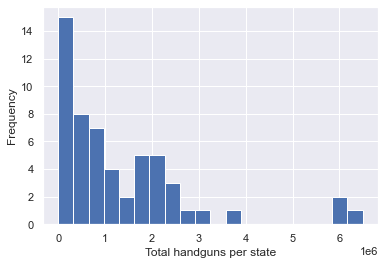

In [79]:
sns.set()
_ = plt.hist(guns['handgun'], bins = 20)
_ = plt.xlabel('Total handguns per state')
_ = plt.ylabel('Frequency')

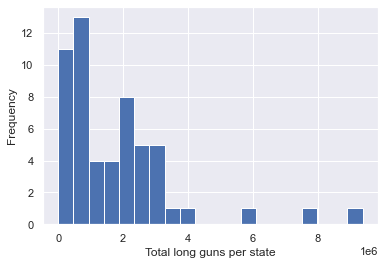

In [80]:
sns.set()
_ = plt.hist(guns['long_gun'], bins = 20)
_ = plt.xlabel('Total long guns per state')
_ = plt.ylabel('Frequency')

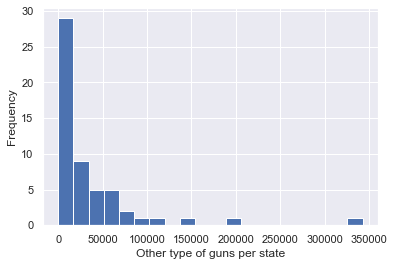

In [64]:
sns.set()
_ = plt.hist(guns['other'], bins = 20)
_ = plt.xlabel('Other type of guns per state')
_ = plt.ylabel('Frequency')

### Question 1: What Census Data is most associated with high gun per capita?

> Subsetting the explore data for the total guns in 2010 and population in order to calculate the gun per capita

In [1688]:
gun_data_2010 = explore_data.loc[:, ['state', 'totals_2010', 'Population, Census, April 1, 2010']]
gun_data_2010.rename(columns = {'Population, Census, April 1, 2010': 'pop_2010'}, inplace = True)
gun_data_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 54
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        50 non-null     object 
 1   totals_2010  50 non-null     int64  
 2   pop_2010     50 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


> Divide the total gun per state by the population in that state to calculate the gun per capita and sort values by gun per capita in descending order to get the highest gun per capita

In [1689]:
gun_data_2010['gun_per_capita'] = gun_data_2010.totals_2010/gun_data_2010.pop_2010
top_5_2010 = gun_data_2010.sort_values('gun_per_capita', ascending = False).head()

> Lets Visualize

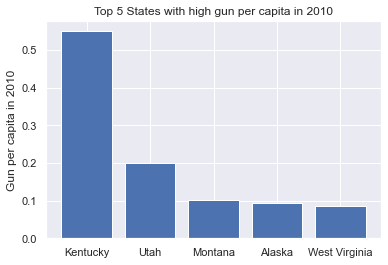

In [1701]:
plt.bar(top_5_2010['state'], top_5_2010['gun_per_capita'])
plt.ylabel('Gun per capita in 2010')
plt.title('Top 5 States with high gun per capita in 2010')

> Subsetting the explore data for the total guns in 2016 and population in order to calculate the gun per capita

In [ ]:
gun_data_2016 = explore_data.loc[:, ['state', 'totals_2016', 'Population estimates, July 1, 2016,  (V2016)']]
gun_data_2016.rename(columns = {'Population estimates, July 1, 2016,  (V2016)': 'pop_2016'}, inplace = True)
gun_data_2016.info()

> Divide the total gun per state by the population in that state to calculate the gun per capita and sort values by gun per capita in descending order to get the highest gun per capita

In [ ]:
gun_data_2016['gun_per_capita'] = gun_data_2016.totals_2016/gun_data_2016.pop_2016
top_5_2016 = gun_data_2016.sort_values('gun_per_capita', ascending = False).head()

> Lets Visualize

In [ ]:
plt.bar(top_5_2016['state'], top_5_2016['gun_per_capita'])
plt.xlabel('US states')
plt.ylabel('Gun per capita in 2016')
plt.title('Top 5 States with high gun per capita in 2016')

> From the bar plots above we can conclude that the 2016 census data is associated with high gun per capita

### Question 2: Which states have had the highest growth in gun registrations?

In [ ]:
gun_reg = explore_data.iloc[:, :5]

> Subtracting the total guns in 2010 from the total guns in 2016 to obtain the growth in gun registrations

In [ ]:
gun_reg['growth'] = gun_reg.totals_2016 - gun_reg.totals_2010
gun_reg.head()

> Lets Visualize the states that has had the highest growth in gun registrations

Text(0.5, 1.0, 'Top 5 States with high growth')

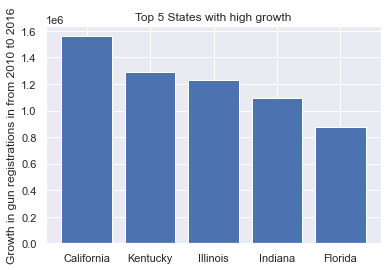

In [1706]:
top_5_growth = gun_reg.sort_values('growth', ascending = False).head()
plt.bar(top_5_growth['state'], top_5_growth['growth'])
plt.ylabel('Growth in gun registrations in from 2010 t0 2016')
plt.title('Top 5 States with high growth')

### Question 3: What is the overall trend of gun purchases?

> Lets create a line chart to view the trend of gun purchases per year

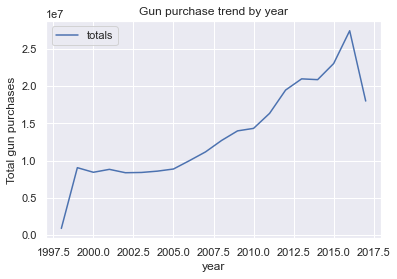

In [1707]:
gun.groupby('year')['totals'].sum().plot(kind = 'line')
plt.ylabel('Total gun purchases')
plt.legend()
plt.title('Gun purchase trend by year')
plt.show()

<a id='conclusions'></a>
## Conclusions

> Question 1: The gun per capita was calculated by dividing the total guns per state for that year and the population census. The census data with the highest gun per capita is 2016 population census. The states of District Of Columbia, Guam, Mariana Islands, Puerto Rico and Virgin Island were exempted from this analysis due to incomplete data. The states with the highest gun per capita for 2010 and 2016 was Kentucky.

> Question 2: Califonia followed by Kentucky, Illinois, Indiana, Florida has the highest growth in gun registrations

> Question 3: Gun purchases has increased exponentially since 1997 up until 2016 and then decreased in 2017 but this can be partially due to the 2017 data having only gun registrations for 9 months 

### Limitation
There were a lot of null values in the census datasets in which I had to drop the fact note column.
Also some states which were in the census were missing from the gun data which could probably be due to 
lack of gathering data.